In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/Colab Notebooks/Archivo_para_tarea_f_2D_2.tif' 'Archivo_para_tarea_f_2D_2.tif'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import matplotlib
import numpy as np
import matplotlib.pylab as plt
from scipy.io import wavfile
import cmath as cm
from skimage import io
from scipy.ndimage import rotate


%matplotlib inline 
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

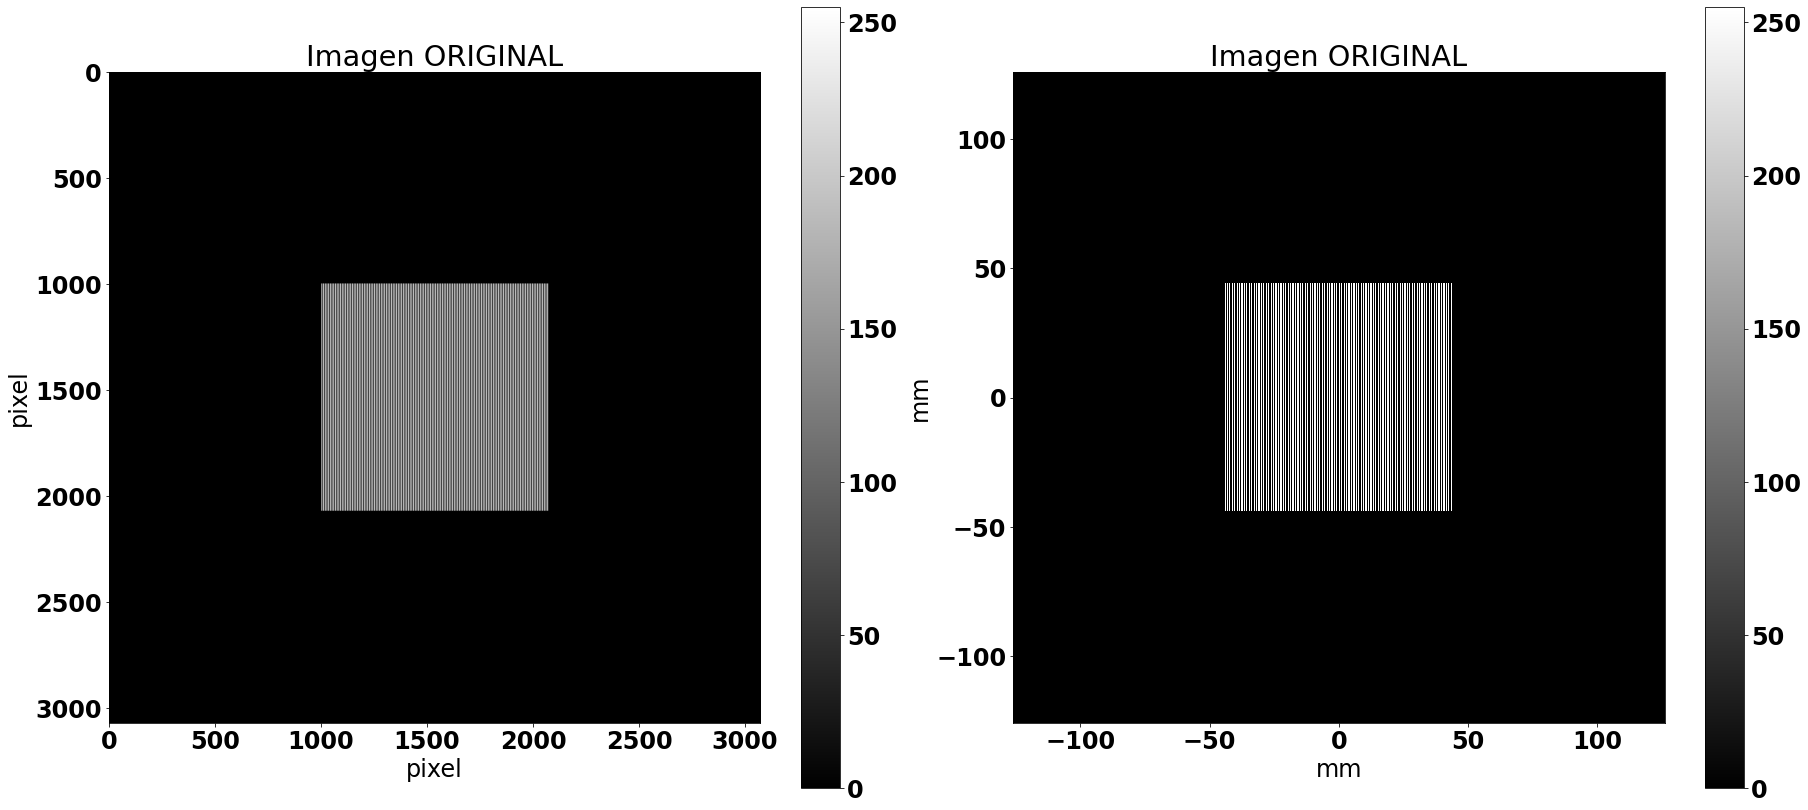

In [5]:
#1.Grafique la red binaria bidimensional, con el sistema de coordenadas (en milímetros)

IM = io.imread('Archivo_para_tarea_f_2D_2.tif')


plt.subplot(1,2,1)
plt.imshow(IM, cmap='gray')
plt.title('Imagen ORIGINAL')
plt.ylabel('pixel')
plt.xlabel('pixel')
plt.colorbar()

plt.subplot(1,2,2)
IM2 = io.imshow('Archivo_para_tarea_f_2D_2.tif', extent=[-126,126,-126,126])
plt.title('Imagen ORIGINAL')
plt.ylabel('mm')
plt.xlabel('mm')
plt.colorbar()

(1.0, 0.08)

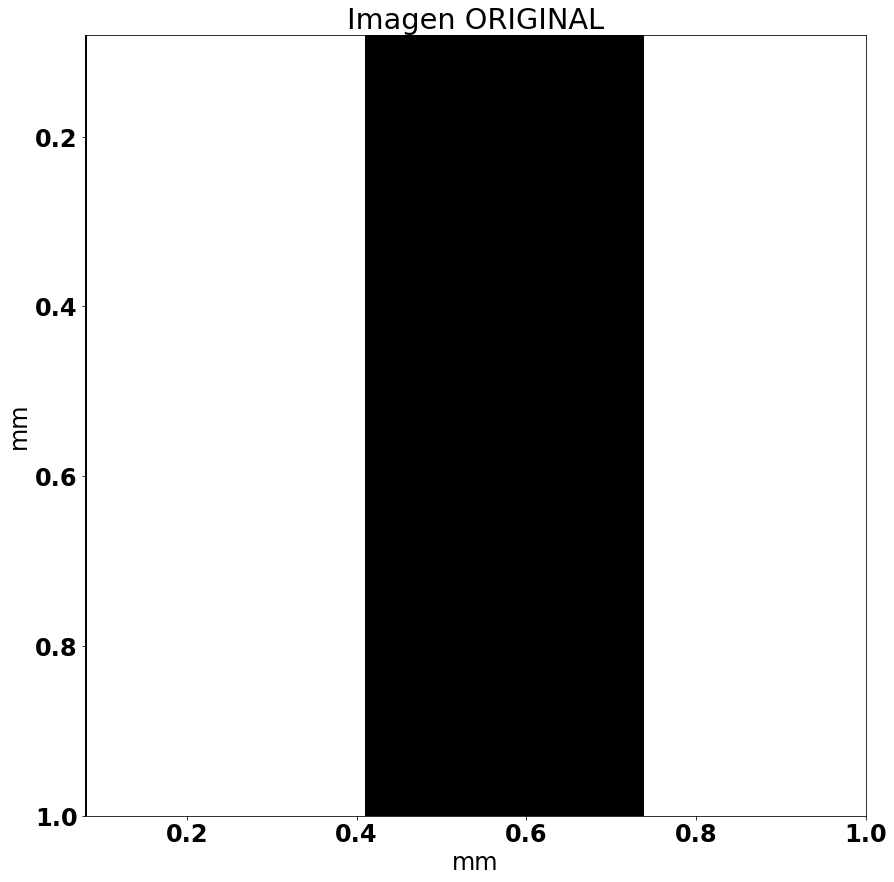

In [6]:
#2.A partir de la figura, obtenga el periodo de la red en mm. Calcule la frecuencia espacial en líneas/mm.
IM2 = io.imshow('Archivo_para_tarea_f_2D_2.tif', extent=[-126,126,-126,126])
plt.title('Imagen ORIGINAL')
plt.ylabel('mm')
plt.xlabel('mm')
plt.xlim(0.08,1)
plt.ylim(1,0.08)

1.43 lineas/mm

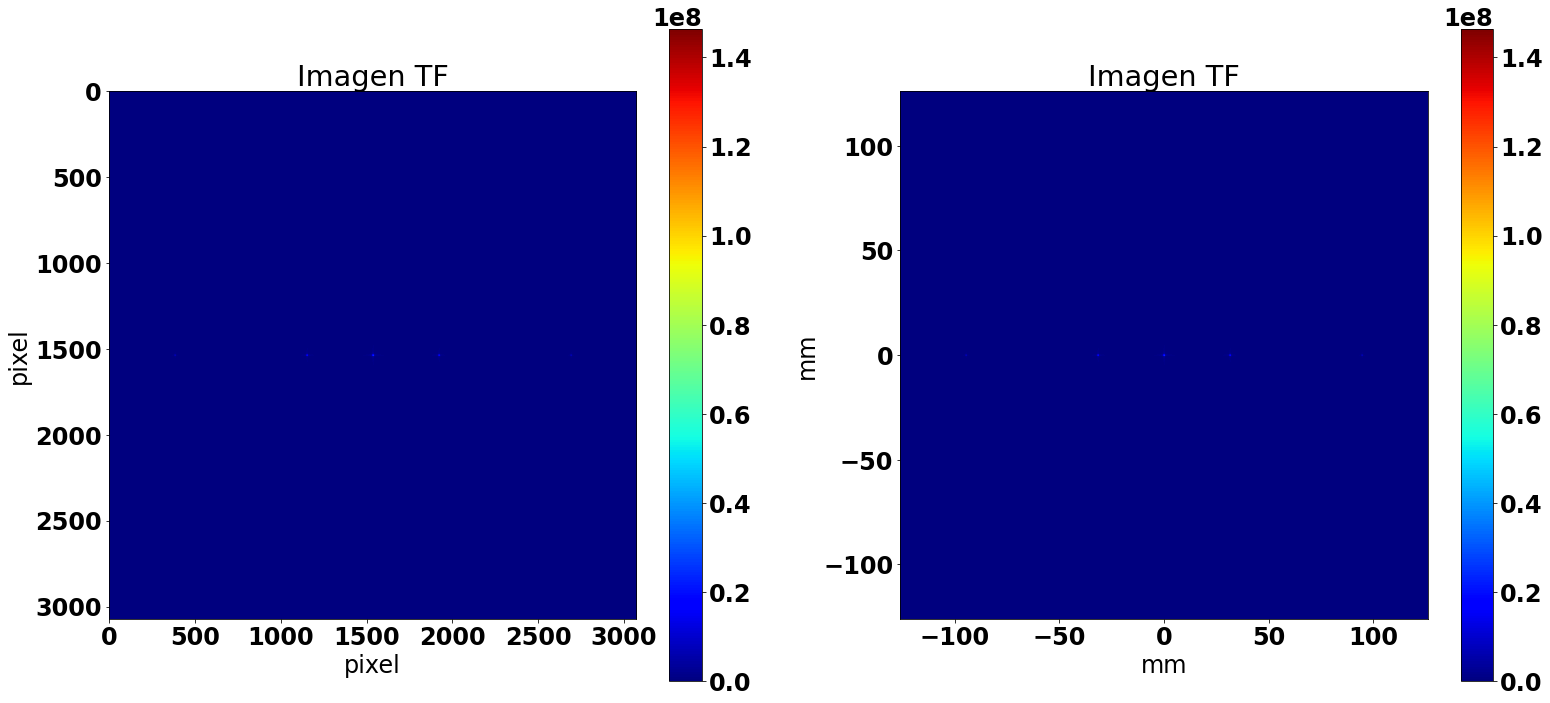

In [7]:
#3.Calcule y grafique la transformada de fourier bidimensional de la red, con el sistema de coordenadas en 1/mm. Obtenga la frecuencia de la red binaria en líneas/mm y compare con el inciso anterior.

TF_IM = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(IM)))

plt.subplot(1,2,1)
plt.imshow(abs(TF_IM), cmap='jet')
plt.title('Imagen TF')
plt.ylabel('pixel')
plt.xlabel('pixel')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(abs(TF_IM), cmap='jet', extent=[-126,126,-126,126])
plt.title('Imagen TF')
plt.ylabel('mm')
plt.xlabel('mm')
plt.colorbar()

(2.0, 0.0)

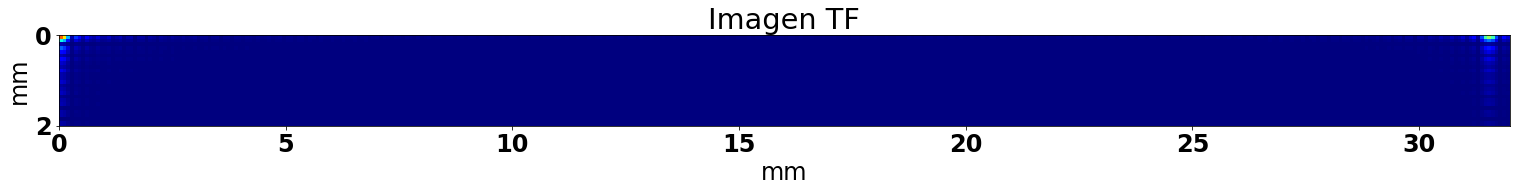

In [8]:
plt.imshow(abs(TF_IM), cmap='jet', extent=[-126,126,-126,126])
plt.title('Imagen TF')
plt.ylabel('mm')
plt.xlabel('mm')
plt.xlim(0,32)
plt.ylim(2,0)

0.031 lineas/mm

In [9]:
#4.Verifique que se cumple el teorema de Parseval (reporte el resultado en 𝜇W. Tenga en cuenta que la información que inicialmente se le dio corresponde a campo óptico ( raíz cuadrada de la potencia lumínica por unidad de área [(W/𝜇m2)^0.5])
IM = IM/(np.max(np.max(IM)))

TF_IM = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(IM)))
TF_IM2 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(TF_IM)))

#Calculo de las energías total en cada espacio
suma1 = sum(sum(abs(IM)**0.5))
suma2 = sum(sum(abs(TF_IM)**0.5))
suma3 = sum(sum(abs(TF_IM2)**0.5))

print('Energía en plano de entrada =', suma1)
print('Energía en plano Fourier =', suma2)
print('Energía en plano de salida =', suma3)

Energía en plano de entrada = 574056.0
Energía en plano Fourier = 16332768.892748201
Energía en plano de salida = 574056.0697036996


In [0]:
#5.A partir de la potencia lumínica en el plano de entrada, y de la potencia en el espacio de frecuencias, determine cómo se distribuye la potencia lumínica en los distintos órdenes de difracción visibles en el espacio de frecuencias, es decir, determine el porcentaje de energía que se va a cada orden de difracción. Use filtros para aislar cada orden de difracción. Tome una ventana de lado aproximadamente de 0.1 1/mm para que calcule la potencia lumínica por cada orden. Consulte el material de apoyo.

#Filtro
def rendija(I,ang,esp):
  filt = np.zeros((I,I))
  filt[int(I/2-esp/2):int(I/2+esp/2),:] = 1
  return rotate(filt,ang,reshape=False)

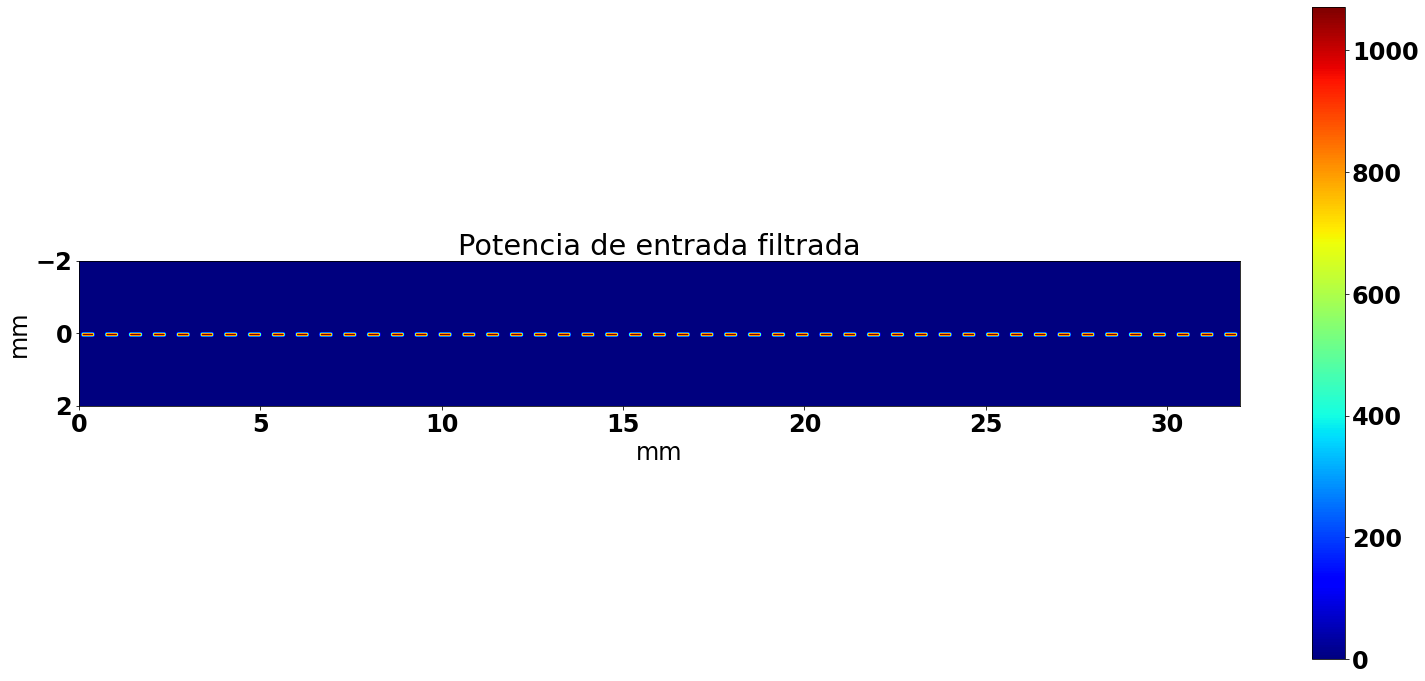

In [19]:
filtro = rendija(len(sum(abs(IM)**0.5)),ang=0,esp=0.11)

PE = sum(abs(IM)**0.5)*(filtro)

plt.imshow(abs(PE), cmap='jet', extent=[-126,126,-126,126] )
plt.title('Potencia de entrada filtrada')
plt.ylabel('mm')
plt.xlabel('mm')
plt.xlim(0,32)
plt.ylim(2,-2)
plt.colorbar()

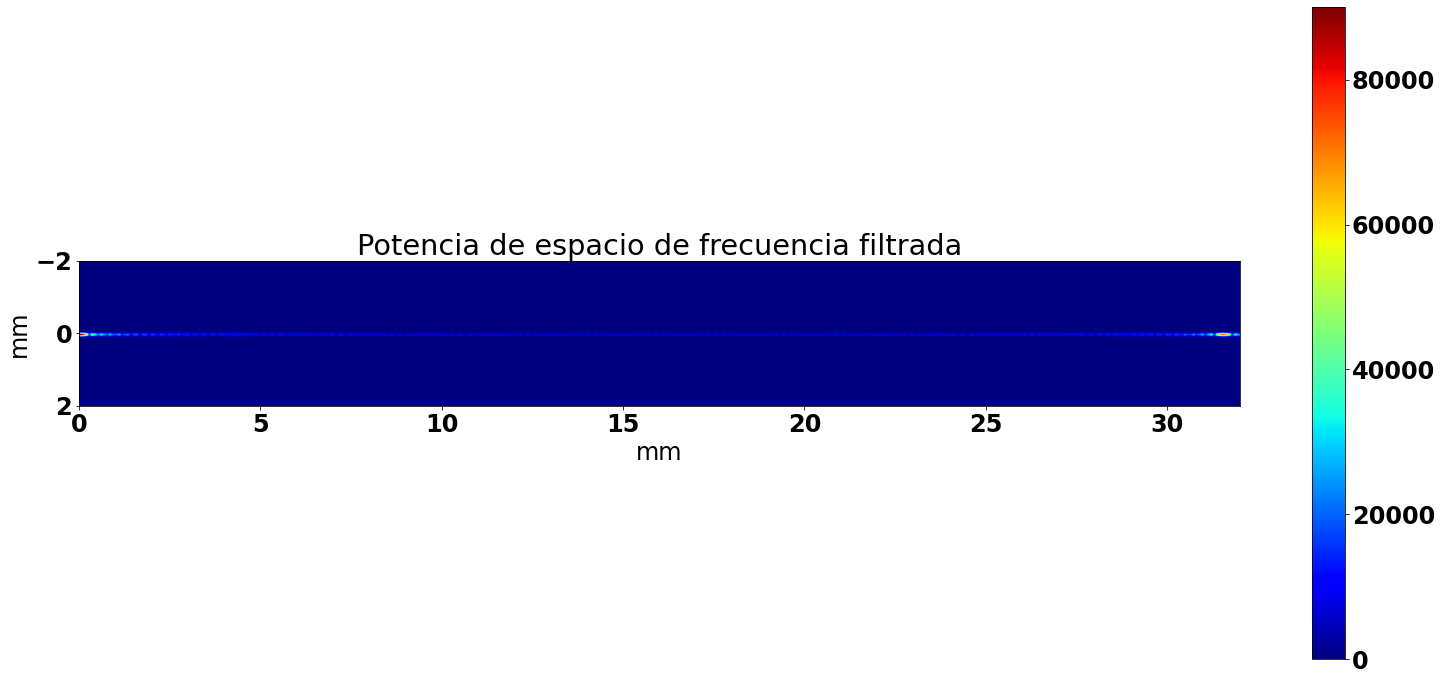

In [20]:
filtro2 = rendija(len(sum(abs(TF_IM)**0.5)),ang=0,esp=0.11)

PE2 = sum(abs(TF_IM)**0.5)*(filtro2)

plt.imshow(abs(PE2), cmap='jet', extent=[-126,126,-126,126] )
plt.title('Potencia de espacio de frecuencia filtrada')
plt.ylabel('mm')
plt.xlabel('mm')
plt.xlim(0,32)
plt.ylim(2,-2)
plt.colorbar()